In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [2]:
dir_path = './dataset/images'

In [3]:
import pathlib
dir_path = pathlib.Path(dir_path)

In [4]:
total_classes = len(list(dir_path.glob('*')))
total_classes

4

In [5]:
messi = list(dir_path.glob('messi/*.jpg'))
len(messi)

11

In [6]:
images_dict = {
    'messi': list(dir_path.glob('messi/*.jpg')),
    'neymar': list(dir_path.glob('neymar/*.jpg')),
    'rohit': list(dir_path.glob('rohit/*.jpg')),
    'ronaldo': list(dir_path.glob('ronaldo/*.jpg'))
}

In [7]:
class_dict = {
    'messi': 0,
    'neymar': 1,
    'rohit': 2,
    'ronaldo': 3
}

In [8]:
IMAGE_SIZE = [224, 224]

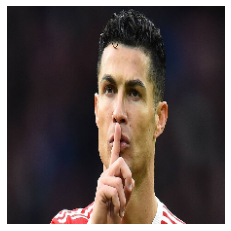

In [9]:
img = cv2.imread(str(images_dict['ronaldo'][3]))
resized_img = cv2.resize(img, IMAGE_SIZE)
final_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(final_img)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            brightness_range=[0, 1],
            fill_mode='nearest'
        )

In [11]:
messi = 'messi'
path = '/dataset/images/' + messi
path

'/dataset/images/messi'

In [12]:
for p_name, p_images in images_dict.items():
    x = []
    for image in p_images:
        image = cv2.imread(str(image))
        image = cv2.resize(image, IMAGE_SIZE)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        x.append(image)

    x = np.array(x)
    print(x.shape)    
    
    i = 0;
    for batch in datagen.flow(x, batch_size=1, save_to_dir='./dataset/images/'+p_name, save_prefix='copy', save_format='jpg'):
        i += 1
        if i > 200:
            break

(11, 224, 224, 3)
(11, 224, 224, 3)
(11, 224, 224, 3)
(11, 224, 224, 3)


In [13]:
total_images_genrated = len(list(dir_path.glob('*/*.jpg')))
print("Total images generated are: ",total_images_genrated)

Total images generated are:  848


In [14]:
x, y = [], []

for p_name, p_images in images_dict.items():
    for image in p_images:
        image = cv2.imread(str(image))
        image = cv2.resize(image, IMAGE_SIZE)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        x.append(image)
        y.append(class_dict[p_name])

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [17]:
x_train = x_train / 255
x_test = x_test / 255

# Model building

In [18]:
from keras.applications.vgg16 import VGG16

In [19]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [20]:
for layer in vgg.layers:
    layer.trainable = False

In [21]:
#flatten the last layer
flatten_layer = layers.Flatten()(vgg.output)

#last softmax layer
prediction = layers.Dense(total_classes, activation='softmax')(flatten_layer)

In [22]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 9s 320ms/step - loss: 0.1193 - accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 9s 339ms/step - loss: 0.0797 - accuracy: 0.9697
Epoch 3/10
2/2 [==============================] - 9s 316ms/step - loss: 0.1819 - accuracy: 0.9697
Epoch 4/10
2/2 [==============================] - 9s 296ms/step - loss: 0.2253 - accuracy: 0.9394
Epoch 5/10
2/2 [==============================] - 9s 312ms/step - loss: 0.1271 - accuracy: 0.9697
Epoch 6/10
2/2 [==============================] - 9s 315ms/step - loss: 0.0501 - accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 9s 328ms/step - loss: 0.0352 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 9s 328ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 9s 334ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 9s 324ms/step - loss: 0.0139 - accuracy: 1.0000


In [27]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 3s 3s/step - loss: 2.6414 - accuracy: 0.3636


[2.641449213027954, 0.3636363744735718]

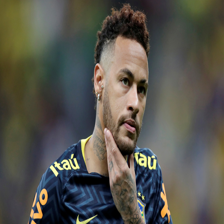

In [35]:
from PIL import Image

neymar = Image.open("./dataset/predict/neymar.jpg").resize(IMAGE_SIZE)
neymar

In [36]:
neymar = np.array(neymar) / 255
neymar = neymar[np.newaxis, ...]
neymar.shape

(1, 224, 224, 3)

In [37]:
prediction = model.predict(neymar)
print(prediction)
prediction = np.argmax(prediction)
print(prediction)

[[0.00555033 0.78602403 0.1053835  0.10304219]]
1
